In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [ ]:
#Read the dataset
data=pd.read_csv('iris (1).csv')
data.drop(['ID'],axis=1,inplace=True)
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
#Seperate into independent variables
X=data.copy()
X.drop(['variety'],axis=1,inplace=True)
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Seperate into dependent variables
Y=data['variety']
Y

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


In [ ]:
# Step 3: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

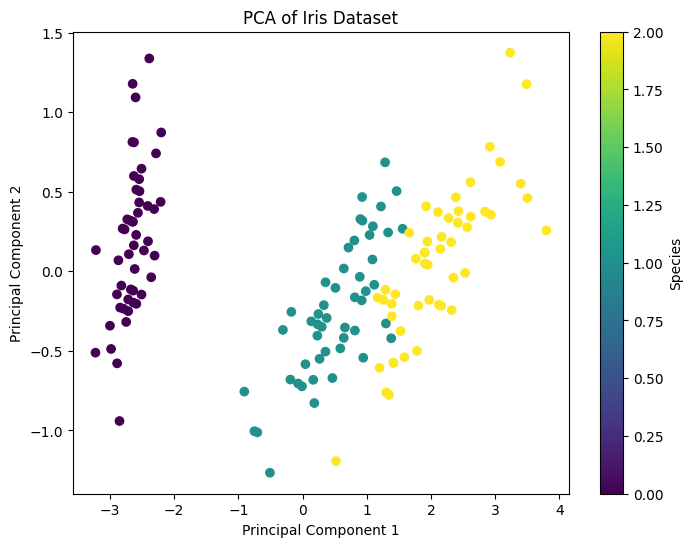

In [ ]:
# Visualize the data after PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y.astype('category').cat.codes, cmap='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.show()

In [ ]:
# Step 4: Perform SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

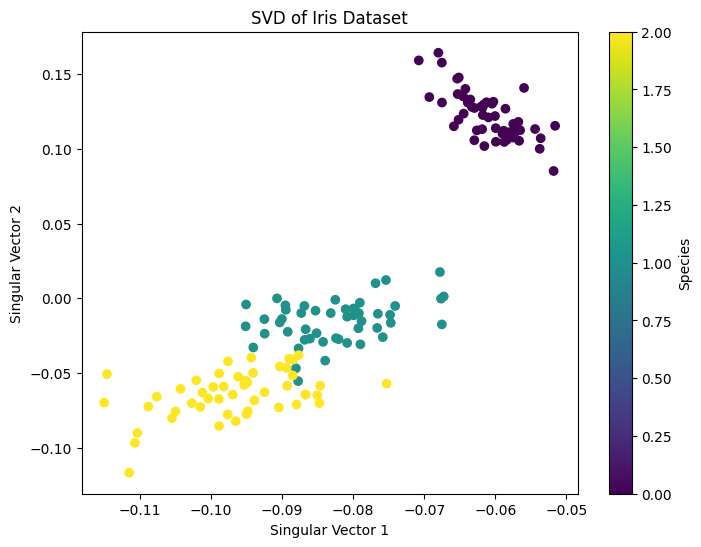

In [ ]:
# Visualize the first 2 components (U is the left singular vectors)
plt.figure(figsize=(8,6))
plt.scatter(U[:, 0], U[:, 1], c=Y.astype('category').cat.codes, cmap='viridis')
plt.title('SVD of Iris Dataset')
plt.xlabel('Singular Vector 1')
plt.ylabel('Singular Vector 2')
plt.colorbar(label='Species')
plt.show()

In [ ]:
# Step 5: Perform LDA
lda = LDA(n_components=2)  # Max possible components = number of classes - 1 (3 classes -> 2 components)
X_lda = lda.fit_transform(X, Y)

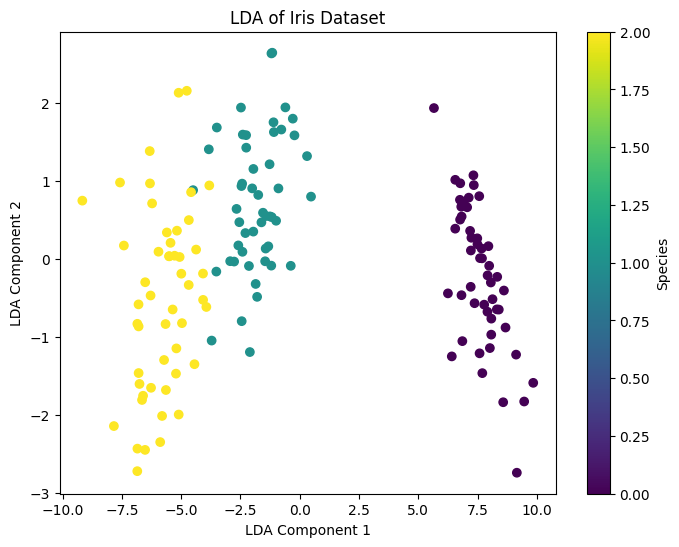

In [ ]:
# Visualize the data after LDA
plt.figure(figsize=(8,6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=Y.astype('category').cat.codes, cmap='viridis')
plt.title('LDA of Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(label='Species')
plt.show()

In [ ]:
# Feature Subset Selection (SelectKBest)
selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features
X_new = selector.fit_transform(X, Y)
selected_features = selector.get_support(indices=True)
print("Selected Feature Indices:", selected_features)
print("Selected Feature Names:", [X.columns[i] for i in selected_features])

Selected Feature Indices: [2 3]
Selected Feature Names: ['petal.length', 'petal.width']


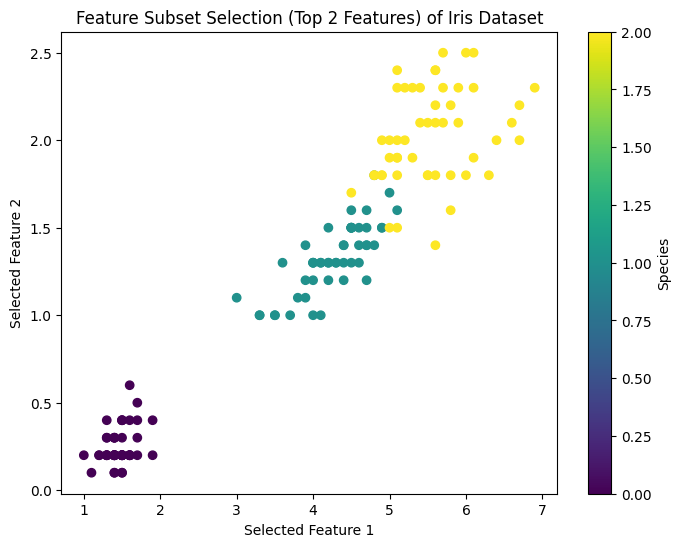

In [ ]:
# Visualize the selected features
plt.figure(figsize=(8,6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y.astype('category').cat.codes, cmap='viridis')
plt.title('Feature Subset Selection (Top 2 Features) of Iris Dataset')
plt.xlabel('Selected Feature 1')
plt.ylabel('Selected Feature 2')
plt.colorbar(label='Species')
plt.show()